In [1]:
import numpy as np
import pandas as pd
import time

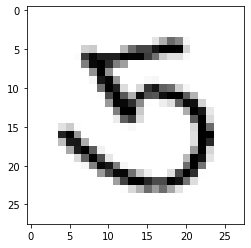

In [2]:
import idx2numpy
import matplotlib.pyplot as plt
file = 'MNIST inputs/train-images.idx3-ubyte'
X = idx2numpy.convert_from_file(file)
plt.imshow(X[19996], cmap=plt.cm.binary)

In [3]:
# Using help from https://www.mathworks.com/matlabcentral/fileexchange/66663-elastic-distortion-transformation-on-an-image
from scipy.ndimage import gaussian_filter as gf
from numpy import linalg as LA
from scipy.ndimage.interpolation import map_coordinates

def elastic_distortion(sigma, alpha, X):
    dx = 2*np.random.rand(28,28) - 1
    dy = 2*np.random.rand(28,28) - 1
    #dx /= LA.norm(dx)
    #dy /= LA.norm(dy)

    #filter to smooth
    #sigmoid is the standard deviation for gaussian blur
    dx = gf(dx, sigma) * alpha
    dy = gf(dy, sigma) * alpha

    x, y = np.meshgrid(np.arange(28),np.arange(28))
    indices = np.reshape(x+dx, (-1,1)), np.reshape(y+dy,(-1,1))
    newX = np.zeros(X.shape)
    for i in range(X.shape[0]):
        newX[i] = map_coordinates(X[i], indices, order=1, mode='constant').reshape(28,28).T
    #transforms image accordingly and leaves blur
    return newX



#shape = X.shape;
#x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(28), np.arange(28), indexing='ij')
#indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), np.reshape(z, (-1, 1))

#newX = map_coordinates(X, indices, order=1, mode='reflect').reshape(shape)




In [18]:
time1 = time.time()
arr = X
for j in range(9):
    newX = np.zeros(X.shape)
    for i in range(30):
        newX[i*2000:(i+1)*2000] = elastic_distortion(3, 10, X[i*2000:(i+1)*2000])
    arr = np.concatenate((arr, newX), axis=0)

time2 = time.time()
print(time2-time1)

65.40999627113342


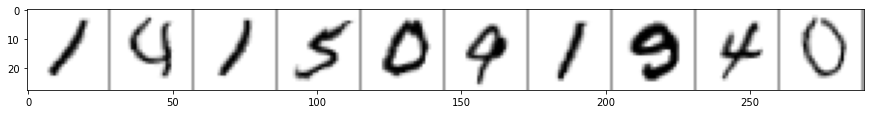

In [5]:
#newX
display_num = 10
display = np.zeros((28, display_num*29))
for i in range(display_num):
    display[:, i*29:(i+1)*29] = np.hstack((newX[15555+i], 100*np.ones((28,1))))
plt.figure(figsize = (15,5))
plt.imshow(display, cmap=plt.cm.binary)

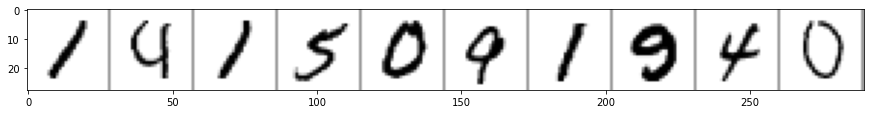

In [6]:
for i in range(display_num):
    display[:, i*29:(i+1)*29] = np.hstack((X[15555+i], 100*np.ones((28,1))))
plt.figure(figsize = (15,5))
plt.imshow(display, cmap=plt.cm.binary)

In [21]:
#np.save('x9.npy', newX)

#for i in range(9,10):
#    a = str(i)
#    loaded = np.load('x'+a+'.npy')
#    np.savez_compressed('x'+a, loaded)
np.savez_compressed('newX', arr = arr)